**NAME:JAISWAL MAHIMA BRIJESH
LETSGROWMORE INTERNSHIP BEGINNER LEVEL TASK -1
IRIS FLOWER CLASSIFICATION PROJECT

# **Library Imports: Importing necessary libraries for data manipulation, visualization, and machine learning.
Code:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

In [5]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **Dataset Loading and Information: Loading the Iris dataset and displaying basic information about its structure and content.
Code:

In [9]:
import pandas as pd
import zipfile

# Specify the path to the ZIP file
zip_file_path = r'C:\Users\HP\Downloads\iris (1).zip'

# Specify the file you want to read
file_to_read = 'iris.data'

# Open the ZIP file and read the specified file using pandas
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    # Read the specified file into a DataFrame
    data = pd.read_csv(zip_file.open(file_to_read))

# Display the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
data. describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [12]:
data.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


# **Label Encoding:Description: Converting categorical labels in the 'class' column to numerical codes (0, 1, 2).
Code:

In [13]:

data=data.replace(to_replace={'class':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [20]:
print(data.head())
data['Iris-setosa'] = data['Iris-setosa'].astype('category').cat.codes

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2            0
1  4.7  3.2  1.3  0.2            0
2  4.6  3.1  1.5  0.2            0
3  5.0  3.6  1.4  0.2            0
4  5.4  3.9  1.7  0.4            0


In [22]:
print(data.columns)

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')


# **Count Plot: Visualizing the distribution of target classes using a countplot.
Code:

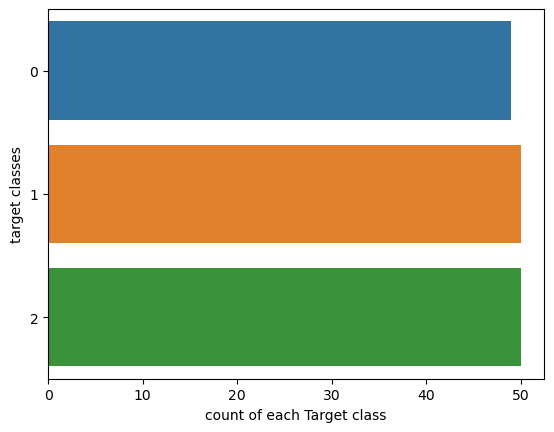

In [24]:


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Iris-setosa' is the correct column name
sns.countplot(y=data['Iris-setosa'], data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target class')
plt.show()

# **Histograms:Plotting histograms for the distribution of each feature.
Code:

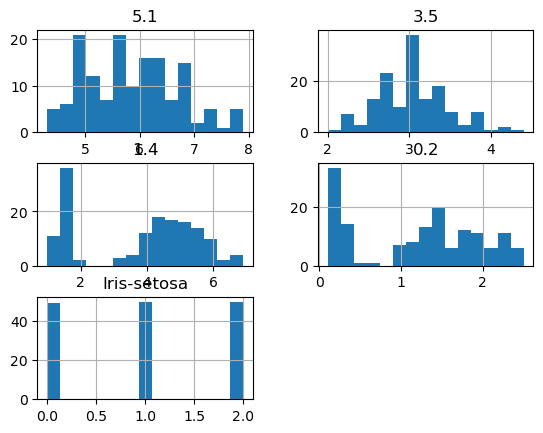

In [25]:
data.hist(bins=15)
plt.title('Featue distibution')
plt.show()

# **Correlation Heatmap:Creating a heatmap to visualize the correlation between features.
Code:

<Axes: >

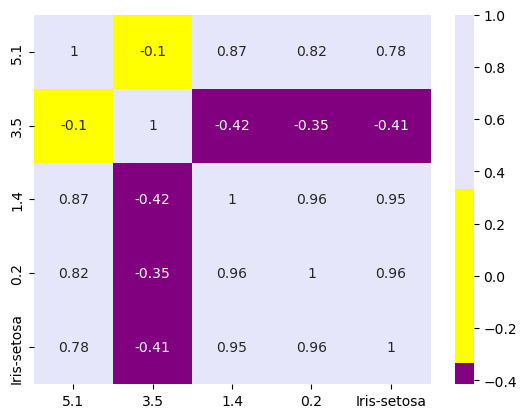

In [47]:
sns.heatmap(data.corr(), annot=True, cmap=['purple', 'yellow', 'lavender'], center=0)

# **Data Shuffling: Randomly shuffling the dataset for better model training.
Code:

In [29]:
data = data.sample(frac = 1)
data. head()

,5.1,3.5,1.4,0.2,Iris-setosa
20,5.1,3.7,1.5,0.4,0
49,7.0,3.2,4.7,1.4,1
16,5.1,3.5,1.4,0.3,0
27,5.2,3.4,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


# **Train-Test Split: Splitting the dataset into training and testing sets.
Code:

In [31]:
print(data.columns)
x = data.drop(['Iris-setosa'], axis=1)
y = data['Iris-setosa']
     

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
     

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
     

reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
reg.fit(x_train, y_train)

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')


LogisticRegression(multi_class='multinomial')

# **Data Scaling: Standardizing the feature values for both training and testing sets.
Code:

In [32]:
y_pred = reg.predict(x_test)
y_proba = reg.predict_proba(x_test)
y_pred

array([2, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0,
       1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2], dtype=int8)

In [33]:
score_lr= reg.score(x_test,y_test)
print(score_lr)

0.9333333333333333


# **Logistic Regression Model Training and Testing: Training a Logistic Regression model and evaluating its accuracy and confusion matrix on the test set.
Code:

In [34]:
actual=y_test
predicted=y_pred
results=confusion_matrix(actual,predicted)
print('confusion matrix')
print(results)

confusion matrix
[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


# **SVM Model Training and Testing: Training a Support Vector Machine (SVM) model and evaluating its accuracy and confusion matrix on the test set.
Code:

In [35]:
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

# **Model Evaluation: Printing the accuracy and confusion matrices of both models on the train and test sets.
Code:

In [36]:
print ("Train - Accuracy :", accuracy_score(y_train, clf.predict(x_train)))
print ("Train - Confusion matrix :\n",confusion_matrix(y_train, clf.
predict(x_train)))
     

Train - Accuracy : 0.9807692307692307
Train - Confusion matrix :
 [[35  0  0]
 [ 0 30  2]
 [ 0  0 37]]


In [37]:
print ("Test - Accuracy :", accuracy_score(y_test, clf.predict
(x_test)))
print ("Test - Confusion matrix :\n",confusion_matrix(y_test, clf.
predict(x_test)))

Test - Accuracy : 0.9555555555555556
Test - Confusion matrix :
 [[14  0  0]
 [ 0 16  2]
 [ 0  0 13]]


# **New Data Prediction: Making predictions for new data points using both models.
Code:

In [38]:
num=[[6.4,2.9,4.3,1.3]]
num

[[6.4, 2.9, 4.3, 1.3]]

In [39]:
num=sc.fit_transform(num)
     

In [43]:

u=clf.predict(num)
u[0]
     
     

1

In [44]:

rslt = reg.predict(num)
rslt[0]

1